In [327]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import db_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [358]:
dataset_name = 'MNIST-SMALL'
db_name = 'DB_{}'.format(dataset_name)
key_name_in_DB = 'constraints'
dfc = db_utils.load_data(db_name, key_name_in_DB)
dfc = dfc.loc[:, dfc.columns != 'reproduce_seed']

In [359]:
# only work with `n_constraints > 5`
dfc = dfc[dfc.n_constraints > 5]

In [360]:
# group by perplexity
dfc2 = dfc.groupby('perp')

In [361]:
summary_by_perp = dfc2.agg(['mean', 'std', 'min', 'max', 'count'])

In [362]:
s_all_means = dfc2.s_all.mean()
x_axis = s_all_means.index.tolist()
mean_vals = s_all_means.get_values()

s_all_errors = dfc2.s_all.std()
error_vals = s_all_errors.get_values()

s_ml_means = dfc2.s_ml.mean().get_values()
s_cl_means = dfc2.s_cl.mean().get_values()

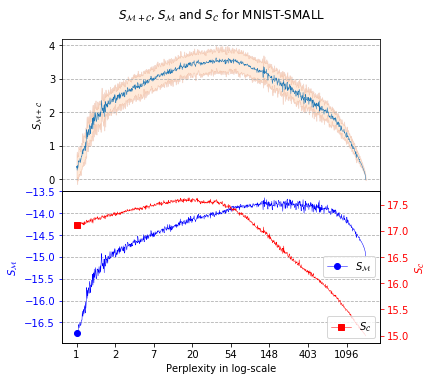

In [363]:
fig, axes = plt.subplots(2, 1, figsize=(6, 5))
ax1, ax2 = axes

ax1.plot(np.log(x_axis), mean_vals , linewidth=0.5, markevery=[0])
# ax.errorbar(np.log(x_axis), mean_vals, yerr=error_vals)
ax1.fill_between(np.log(x_axis), mean_vals - error_vals, mean_vals + error_vals,
               alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848', linewidth=0.8,
               interpolate=True, antialiased=True)
ax1.set_ylabel('$S_{\mathcal{M}+\mathcal{C}}$')

line2, = ax2.plot(np.log(x_axis), s_ml_means, '-bo',
                  linewidth=0.5, markevery=[0], label='$S_{\mathcal{M}}$')
ax2.set_ylabel('$S_{\mathcal{M}}$', color='b')
ax2.tick_params('y', colors='b')
ax2.legend(handles=[line2], loc='center right')

ax3 = ax2.twinx()
line3, = ax3.plot(np.log(x_axis), s_cl_means, '-rs',
                  linewidth=0.5, markevery=[0], label='$S_{\mathcal{C}}$')
ax3.set_ylabel('$S_{\mathcal{C}}$', color='r')
ax3.tick_params('y', colors='r')
ax3.legend(handles=[line3], loc=4)

lbls = ax3.get_xticks()
x_labels = list(map(int, np.exp(lbls)))
ax3.set_xticklabels(x_labels)

# ax1.grid(True)
# ax2.grid(True)
ax1.yaxis.grid(True, linestyle='--')
ax2.yaxis.grid(True, linestyle='--')
ax2.set_xlabel('Perplexity in log-scale')

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.suptitle('$S_{\mathcal{M}+\mathcal{C}}, S_{\mathcal{M}}$ and $S_{\mathcal{C}}$ '+
             'for {}'.format(dataset_name), y=1.05)
plt.savefig('./plots/[{}]constraint_scores.png'.format(dataset_name))

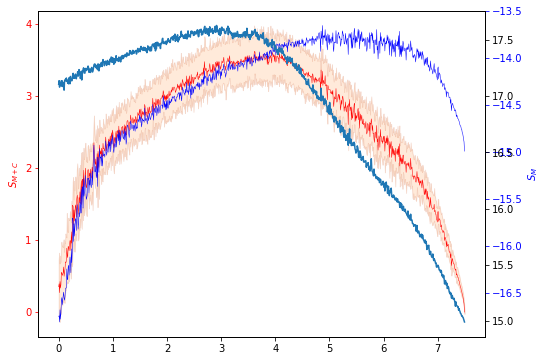

In [364]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(np.log(x_axis), mean_vals, 'r-', linewidth=0.5)
# ax.errorbar(np.log(x_axis), mean_vals, yerr=error_vals)
ax.fill_between(np.log(x_axis), mean_vals - error_vals, mean_vals + error_vals,
               alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848', linewidth=0.8,
               interpolate=True, antialiased=True)
ax.set_ylabel('$S_{M+C}$', color='r')
ax.tick_params('y', colors='r')

ax2 = ax.twinx()
ax2.plot(np.log(x_axis), s_ml_means, 'b-', linewidth=0.5)
ax2.set_ylabel('$S_M$', color='b')
ax2.tick_params('y', colors='b')

ax3 = ax.twinx()
ax3.plot(np.log(x_axis), s_cl_means)